# Understanding 1D convolution for sequence data
1D convolution is a technique used for analyzing and processing sequential data, such as time series or text. It involves applying a set of filters to the input sequence to extract relevant features. Each filter is a small window (kernel) that slides along the sequence, computing dot products with the elements in its receptive field.

Let's consider the following input sequence:

Input sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9]

We'll also define a filter/kernel of size 3:

Filter/kernel: [0.5, 1, -0.5]

To perform 1D convolution, we slide the filter/kernel along the input sequence, multiplying the filter values with the corresponding input values and summing up the results. Let's see the step-by-step process:

Step 1:
Apply the filter to the first three elements of the input sequence:
[1, 2, 3] * [0.5, 1, -0.5] = (1 * 0.5) + (2 * 1) + (3 * -0.5) = 0 + 2 - 1.5 = 0.5

Step 2:
Slide the filter by one position and apply it to the next three elements:
[2, 3, 4] * [0.5, 1, -0.5] = (2 * 0.5) + (3 * 1) + (4 * -0.5) = 1 + 3 - 2 = 2

Step 3:
Slide the filter again and apply it to the next three elements:
[3, 4, 5] * [0.5, 1, -0.5] = (3 * 0.5) + (4 * 1) + (5 * -0.5) = 1.5 + 4 - 2.5 = 3

Continue this process until we reach the end of the sequence.

Step 4:
[4, 5, 6] * [0.5, 1, -0.5] = (4 * 0.5) + (5 * 1) + (6 * -0.5) = 2 + 5 - 3 = 4

Step 5:
[5, 6, 7] * [0.5, 1, -0.5] = (5 * 0.5) + (6 * 1) + (7 * -0.5) = 2.5 + 6 - 3.5 = 5

Step 6:
[6, 7, 8] * [0.5, 1, -0.5] = (6 * 0.5) + (7 * 1) + (8 * -0.5) = 3 + 7 - 4 = 6

Step 7:
[7, 8, 9] * [0.5, 1, -0.5] = (7 * 0.5) + (8 * 1) + (9 * -0.5) = 3.5 + 8 - 4.5 = 7

The result of the 1D convolution operation is the sequence of output values:

Output sequence: [0.5, 2, 3, 4, 5, 6, 7]

In this example, the output sequence represents the extracted features from the input sequence using the given filter/kernel.

1D convolution is often used in conjunction with other layers in deep learning models, such as pooling layers and fully connected layers, to perform tasks like classification, regression, or sequence generation.

# Understanding 1D pooling for sequence data
1D pooling is a technique to reduce the dimensionality of sequence data, such as time series or text, while preserving important information. It helps in capturing the most relevant features from the input sequence. Max pooling is one of the commonly used types of 1D pooling.

Let's consider the following input sequence:

Input sequence: [3, 5, 2, 1, 4, 6, 2, 1]

We'll apply max pooling with a pool size of 2, which means we'll divide the sequence into non-overlapping windows of size 2 and take the maximum value from each window. Here's the step-by-step process:

Step 1:
Apply max pooling to the first two elements: [3, 5]
Max value: 5

Step 2:
Move the window by two positions and apply max pooling: [2, 1]
Max value: 2

Step 3:
Move the window by two positions and apply max pooling: [4, 6]
Max value: 6

Step 4:
Move the window by two positions and apply max pooling: [2, 1]
Max value: 2

The result of the 1D max pooling operation is the sequence of maximum values:

Output sequence: [5, 2, 6, 2]

In this example, the output sequence is obtained by taking the maximum value from each non-overlapping window of size 2.

Max pooling helps in reducing the dimensionality of the input sequence while retaining the most important features. It is commonly used after convolutional layers to downsample the feature maps and capture the most salient information.

Other types of 1D pooling, such as average pooling, work similarly but take the average value within each window instead of the maximum.

In [1]:
import tensorflow as tf
import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [4]:
max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [8]:
import warnings
warnings.filterwarnings("ignore")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [9]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 49s 304ms/step - loss: 0.8690 - acc: 0.5144 - val_loss: 0.6883 - val_acc: 0.5572
Epoch 2/10
157/157 [==============================] - 47s 300ms/step - loss: 0.6713 - acc: 0.6400 - val_loss: 0.6721 - val_acc: 0.6062
Epoch 3/10
157/157 [==============================] - 48s 307ms/step - loss: 0.6339 - acc: 0.7448 - val_loss: 0.6335 - val_acc: 0.7244
Epoch 4/10
157/157 [==============================] - 50s 320ms/step - loss: 0.5650 - acc: 0.8072 - val_loss: 0.5386 - val_acc: 0.7902
Epoch 5/10
157/157 [==============================] - 50s 318ms/step - loss: 0.4449 - acc: 0.8433 - val_loss: 0.4432 - val_acc: 0.8230
Epoch 6/10
157/157 [==============================] - 54s 343ms/step - loss: 0.3544 - acc: 0.8714 - val_loss: 0.4054 - val_acc: 0.8544
Epoch 7/10
157/157 [==============================] - 52s 330ms/step - loss: 0.3077 - acc: 0.8933 - val_loss: 0.4020 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================] - 5

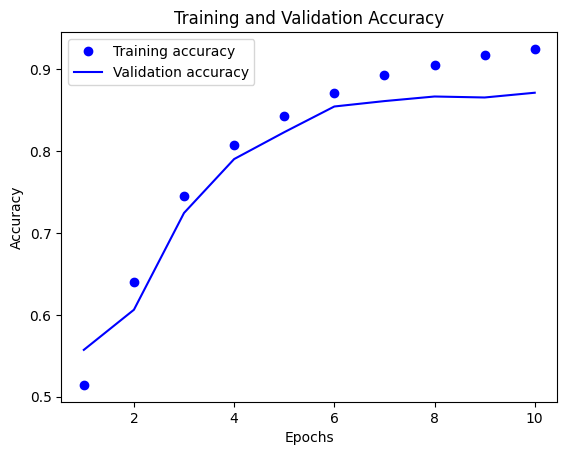

In [10]:
import matplotlib.pyplot as plt

# Get accuracy values from training history
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

# Plot accuracy
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

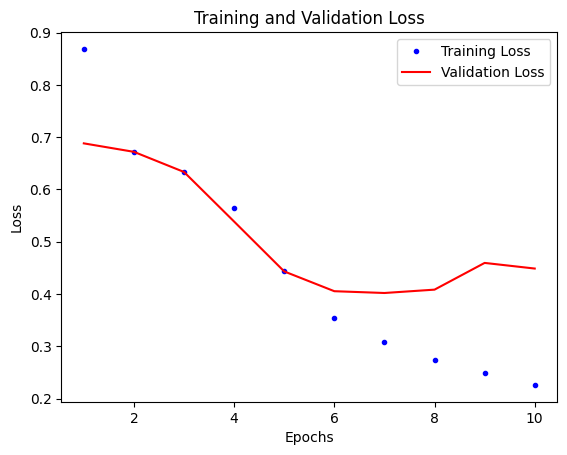

In [11]:
import matplotlib.pyplot as plt

# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b.', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2D Convolutional Neural Networks:
2D CNNs are primarily used for processing two-dimensional data, most commonly images. The convolutional operation in a 2D CNN is similar to that of a 1D CNN, but it operates on a 2D grid of pixels. The filter slides across the image in both the width and height dimensions, computing dot products to extract spatial features. These features help the network learn hierarchical representations of the image, capturing both local and global patterns.

# Max Pooling:
In max pooling, the feature map is divided into non-overlapping regions (e.g., 2x2 or 3x3). For each region, the maximum value is selected and propagated to the next layer. Max pooling helps retain the most dominant features in a local neighborhood, enhancing the network's ability to detect important patterns.

# Average Pooling:
In average pooling, similar to max pooling, the feature map is divided into non-overlapping regions. However, instead of selecting the maximum value, average pooling computes the average value within each region. Average pooling can help provide a more smoothed representation of the features, useful for certain tasks like image segmentation.

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [13]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = np.expand_dims(X_train, axis=-1) / 255.0
X_test = np.expand_dims(X_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
# Create a 2D CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [17]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 48s 98ms/step - loss: 0.2357 - accuracy: 0.9301 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 0.0436 - val_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 4/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0259 - val_accuracy: 0.9923
Epoch 6/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 7/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0280 - val_accuracy:

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0329 - accuracy: 0.9901
Test loss: 0.0329
Test accuracy: 0.9901


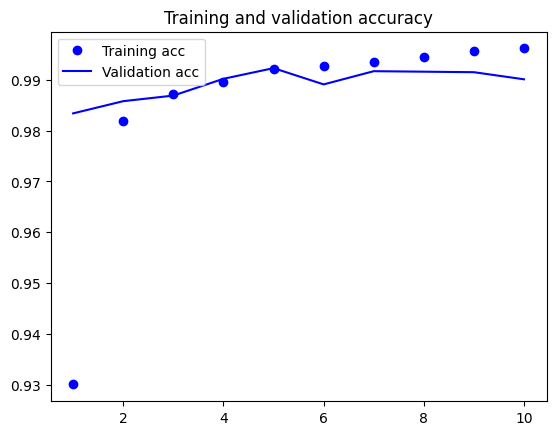

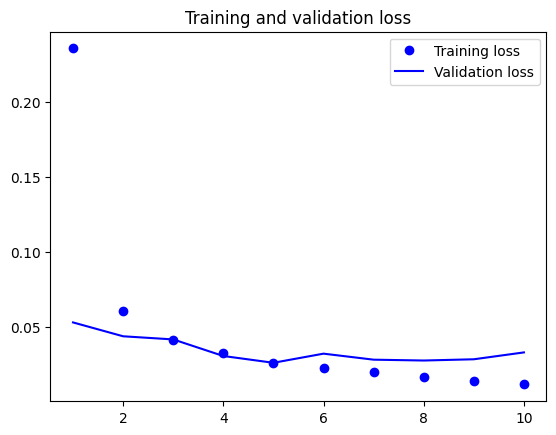

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()